In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm #to build hidden markov model 

In [111]:
stocktrain = pd.read_csv("kotrain.csv")
stocktest = pd.read_csv("kotest.csv")

In [112]:
#preparing the train data
perchange = stocktrain.loc[:,"Percentchange"]
price = stocktrain.loc[:,"Price"]
perchange_std = perchange.rolling(window=5).std()
perchange_mean = perchange.rolling(window=5).mean()
price_std = price.rolling(window=5).std()
price_mean = price.rolling(window=5).mean()
newdf = pd.DataFrame({"Perchange Std" : perchange_std[4:]*100,
                      "Perchange Mean" : perchange_mean[4:]*100,
                      "Price Std" : price_std[4:],
                      "Price Mean" : price_std[4:]
                     })
newdf.head()

,Perchange Std,Perchange Mean,Price Std,Price Mean
4,0.305355,0.05700,0.100598,0.100598
5,0.310252,0.04286,0.079056,0.079056
6,0.406837,0.11820,0.122475,0.122475
7,0.439402,0.07138,0.112916,0.112916
8,0.408445,0.03350,0.125817,0.125817


In [113]:
#preparing the test data
perchange1 = stocktest.loc[:,"Percentchange"]
price1 = stocktest.loc[:,"Price"]
perchange1_std = perchange1.rolling(window=5).std()
perchange1_mean = perchange1.rolling(window=5).mean()
price1_std = price1.rolling(window=5).std()
price1_mean = price1.rolling(window=5).mean()
testdf = pd.DataFrame({"Perchange Std" : perchange1_std[4:]*100,
                      "Perchange Mean" : perchange1_mean[4:]*100,
                      "Price Std" : price1_std[4:],
                      "Price Mean" : price1_std[4:]
                     })
testdf.head()

,Perchange Std,Perchange Mean,Price Std,Price Mean
4,0.660137,0.44292,0.416616,0.416616
5,0.627348,0.61544,0.588837,0.588837
6,0.627188,0.61634,0.699835,0.699835
7,0.553398,0.65862,0.570964,0.570964
8,0.549806,0.69160,0.366715,0.366715


In [114]:
#fit the hidden markov model and printing out the predictions and score
model = hmm.GaussianHMM(n_components=4)
fit = model.fit(newdf.iloc[:,0:2])

pred = model.predict(newdf.iloc[:,0:2])
pred1 = model.predict(testdf.iloc[:,0:2])

score = model.score(newdf.iloc[:,0:2])
score1 = model.score(testdf.iloc[:,0:2])

print(pred)
print(pred1)

print(score)
print(score1)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 3 3 3 3 3 1 1 1 1 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 3 3 3 3 0 0 3 3 2 2 2 2 2 1 1 1 1 1 0 0 0 3 3 3 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 0 0 0 0 3 3 2 2 2 2 2 1 1 1 1 3 3 3 2 2 2 2 2 2 2 1
 1 0 0 0 3 3 3 3 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 3 3 3 3 3 0 0 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 0 0 3 3 3 1 1 1 1 1 1 1 3 3 3 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 3 3 0 0 0 0 3 2 2 2 2 2 1 1 1 1 0

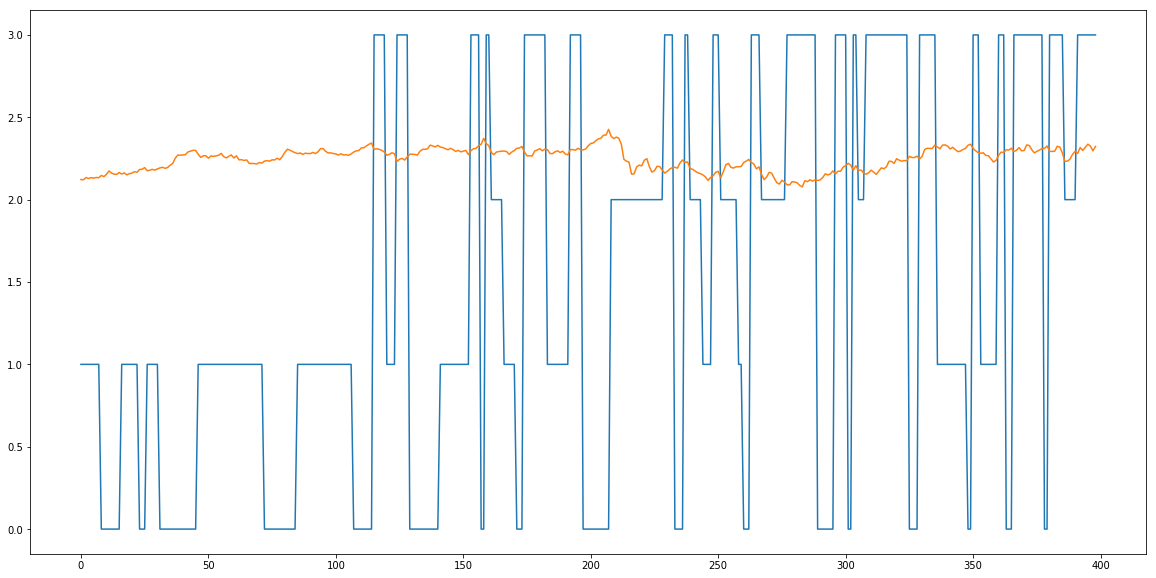

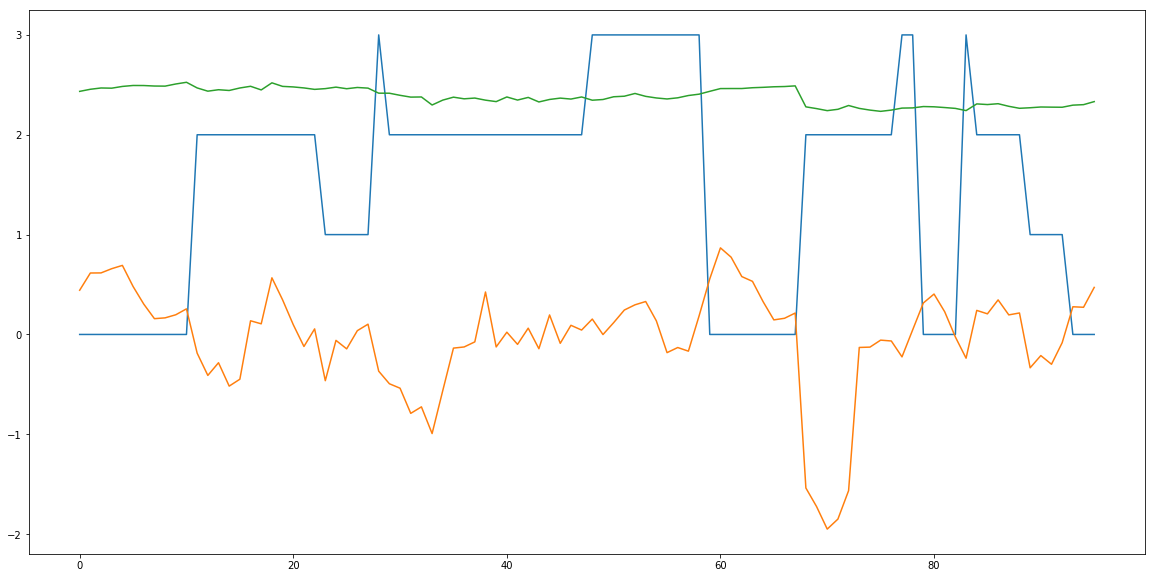

In [115]:
#plotting predictions with the stock price and percentage change
plt.figure(figsize=(20,10))
plt.plot(np.arange(pred.shape[0]), pred)
y = stocktrain.loc[:,"Price"]/20
plt.plot(np.arange(pred.shape[0]),  y.iloc[4:])
plt.show()

plt.figure(figsize=(20,10))
plt.plot(np.arange(pred1.shape[0]), pred1)
y = stocktest.loc[:,"Price"]/20
y1 = testdf.loc[:, "Perchange Mean"]
plt.plot(np.arange(pred1.shape[0]), y1)
plt.plot(np.arange(pred1.shape[0]),  y.iloc[4:])
plt.show()

In [116]:
model.means_

array([[ 0.44871797,  0.27675396],
       [ 0.45377605, -0.10517509],
       [ 1.27097385, -0.32142345],
       [ 0.83086712,  0.08174457]])

In [117]:
#preparing for strategy 

high_std_highneg_mean = 2
high_std_lowpos_mean = 3
med_std_highpos_mean = 0
med_std_lowneg_mean = 1

In [118]:
last_price = price[4]
profit = 0
for i in range(1,len(pred)):
    curr_price = price[4+i]
    state = pred[i]
    prev_state = pred[i-1]
    if state == high_std_highneg_mean  and prev_state != high_std_highneg_mean:
        #sell
        profit += curr_price - last_price
    elif state != high_std_highneg_mean and prev_state ==high_std_highneg_mean:
        #buy
        last_price = curr_price
profit

2.690015000000024

In [119]:
last_price = price[4]
profit = 0
for i in range(1,len(pred)):
    curr_price = price[4+i]
    state = pred[i]
    prev_state = pred[i-1]
    if state == med_std_lowneg_mean and prev_state != med_std_lowneg_mean:
        #sell
        profit += curr_price - last_price
    elif state != med_std_lowneg_mean and prev_state ==med_std_lowneg_mean:
        #buy
        last_price = curr_price
profit

0.14000700000001842

In [120]:
last_price = price[4]
profit = 0
for i in range(1,len(pred)):
    curr_price = price[4+i]
    state = pred[i]
    prev_state = pred[i-1]
    if state == med_std_highpos_mean and prev_state != med_std_highpos_mean:
        #sell
        profit += curr_price - last_price
    elif state != med_std_highpos_mean and prev_state ==med_std_highpos_mean:
        #buy
        last_price = curr_price
profit

-0.9600080000000162

In [121]:
last_price = price[4]
profit = 0
for i in range(1,len(pred)):
    curr_price = price[4+i]
    state = pred[i]
    prev_state = pred[i-1]
    if state == high_std_highneg_mean and prev_state != high_std_highneg_mean:
        #sell
        profit += curr_price - last_price
    elif state != high_std_highneg_mean and prev_state ==high_std_highneg_mean:
        #buy
        last_price = curr_price
profit

2.690015000000024

In [139]:
#Main Strategy for risk seeker 

last_price = price[4]
profit = 0
for i in range(1,len(pred)):
    curr_price = price[4+i]
    state = pred[i]
    prev_state = pred[i-1]
    if (state == med_std_highpos_mean or state == high_std_lowpos_mean) and (prev_state != med_std_highpos_mean and prev_state != high_std_lowpos_mean):
        #sell
        profit += curr_price - last_price
    elif (state != med_std_highpos_mean and state != high_std_lowpos_mean) and (prev_state == med_std_highpos_mean or prev_state == high_std_lowpos_mean):
        #buy
        last_price = curr_price
profit

3.2799819999999613

In [137]:
#Main startegy for risk averse person 

last_price = price[4]
profit = 0
for i in range(1,len(pred)-1):
    curr_price = price[4+i]
    state = pred[i]
    next_state = pred[i+1]
    if state == 2 & state == 0 and next_state != 2 & next_state != 0:
        #sell
        profit += curr_price - last_price
    elif state != 2 & state != 0 and next_state == 2 & next_state == 0:
        #buy
        last_price = curr_price
profit

11.68

In [124]:
baselineprofit = price[399]-price[4]
baselineprofit

4.290000999999997

In [125]:
#for testing dataset
last_price = price1[4]
profit = 0
for i in range(1,len(pred1)):
    curr_price = price1[4+i]
    state = pred1[i]
    prev_state = pred1[i-1]
    if state == 3 and prev_state != 3:
        #sell
        profit += curr_price - last_price
    elif state != 3 and prev_state ==3:
        #buy
        last_price = curr_price
profit

-5.930001999999995

In [126]:
last_price = price1[4]
profit = 0
for i in range(1,len(pred1)):
    curr_price = price1[4+i]
    state = pred1[i]
    prev_state = pred1[i-1]
    if state == 1 and prev_state != 1:
        #sell
        profit += curr_price - last_price
    elif state != 1 and prev_state ==1:
        #buy
        last_price = curr_price
profit

-2.369999

In [127]:
last_price = price1[4]
profit = 0
for i in range(1,len(pred1)):
    curr_price = price1[4+i]
    state = pred1[i]
    prev_state = pred1[i-1]
    if state == 2 and prev_state != 2:
        #sell
        profit += curr_price - last_price
    elif state != 2 and prev_state ==2:
        #buy
        last_price = curr_price
profit

-0.7199980000000039

In [128]:
last_price = price1[4]
profit = 0
for i in range(1,len(pred1)):
    curr_price = price1[4+i]
    state = pred1[i]
    prev_state = pred1[i-1]
    if state == 0 and prev_state != 0:
        #sell
        profit += curr_price - last_price
    elif state != 0 and prev_state ==0:
        #buy
        last_price = curr_price
profit

0.4700019999999938

In [129]:
last_price = price1[4]
profit = 0
for i in range(1,len(pred1)):
    curr_price = price1[4+i]
    state = pred1[i]
    prev_state = pred1[i-1]
    if state == 2 & state == 0 and prev_state != 2 & prev_state != 0:
        #sell
        profit += curr_price - last_price
    elif state != 2 & state != 0 and prev_state == 2 & prev_state == 0:
        #buy
        last_price = curr_price
profit

-3.0299949999999995

In [135]:
baseline2 = price1[99]-price1[4]
baseline2

-2.0500000000000043